# Projet de fin d'études : Détection de Parkinson
Léo Congourdeau - Siyam Regikumar
___

In [124]:
# Importer les bibliothèques nécessaires
import os
import librosa
import numpy as np
import pandas as pd

In [125]:
# Chemins vers les dossiers
healthy = r"C:\Users\Siyam\Desktop\Ingé 3\Projet\ParkinsonVoices\HC_AH"
disease = r"C:\Users\Siyam\Desktop\Ingé 3\Projet\ParkinsonVoices\PD_AH"

In [126]:
# Charger les autres données
demographics = pd.read_excel(r"C:\Users\Siyam\Desktop\Ingé 3\Projet\ParkinsonVoices\Demographics_age_sex.xlsx")
print(demographics.head())

                                      Sample ID Label   Age Sex
0  AH_064F_7AB034C9-72E4-438B-A9B3-AD7FDA1596C5    HC  69.0   M
1  AH_114S_A89F3548-0B61-4770-B800-2E26AB3908B6    HC  43.0   M
2  AH_121A_BD5BA248-E807-4CB9-8B53-47E7FFE5F8E2    HC  18.0   F
3  AH_123G_559F0706-2238-447C-BA39-DB5933BA619D    HC  28.0   M
4  AH_195B_39DA6A45-F4CC-492A-80D4-FB79049ACC22    HC  68.0   M


In [127]:
# Fonction chargement audio
def charger_audio(fichier_audio):
    audio_data = []
    for file_name in os.listdir(fichier_audio):
        if file_name.endswith('.wav'):
            file_path = os.path.join(fichier_audio, file_name)
            y, sr = librosa.load(file_path, sr=None)  
            # y = signal audio, sr = fréquence d'échantillonnage
            # sr=None pour conserver la fréquence d'origine
            # Ajouter les données à la liste
            audio_data.append((file_name, y, sr))
            # print(f"Fichier chargé: {file_name} (Fréquence d'échantillonnage: {sr})")
    return audio_data

In [128]:
# Charger les données audio
healthy_audio = charger_audio(healthy)
disease_audio = charger_audio(disease)

In [129]:
# Fonction chargement des durées d'audio
def charger_duree_audio(audio_data):
    duree_audio = []
    for audio in audio_data:
        duree = librosa.get_duration(y=audio[1], sr=audio[2])
        duree_audio.append((audio[0], duree))
        # print(f"Durée de l'audio {audio[0]}: {duree} secondes")
    return duree_audio

In [130]:
# Charger les durées d'audio
healthy_duree = charger_duree_audio(healthy_audio)
disease_duree = charger_duree_audio(disease_audio)

In [131]:
# Tableau des durées d'audio
healthy_duree = pd.DataFrame(healthy_duree, columns=['Sample ID', 'Durée'])
disease_duree = pd.DataFrame(disease_duree, columns=['Sample ID', 'Durée'])
combined_duree = pd.concat([healthy_duree, disease_duree], ignore_index=True)

# Afficher le tableau des durées d'audio
print(combined_duree.head())


                                          Sample ID     Durée
0  AH_064F_7AB034C9-72E4-438B-A9B3-AD7FDA1596C5.wav  3.738875
1  AH_114S_A89F3548-0B61-4770-B800-2E26AB3908B6.wav  2.267375
2  AH_121A_BD5BA248-E807-4CB9-8B53-47E7FFE5F8E2.wav  2.867625
3  AH_123G_559F0706-2238-447C-BA39-DB5933BA619D.wav  2.863500
4  AH_195B_39DA6A45-F4CC-492A-80D4-FB79049ACC22.wav  4.210500


In [132]:
# Statistique sur les audios
print(healthy_duree.describe())
print(disease_duree.describe())
print(combined_duree.describe())

           Durée
count  41.000000
mean    3.065027
std     1.073955
min     1.625250
25%     2.042250
50%     2.867625
75%     3.919750
max     5.763625
           Durée
count  40.000000
mean    3.589625
std     1.526755
min     1.516125
25%     2.426438
50%     3.324875
75%     4.173906
max     7.208000
           Durée
count  81.000000
mean    3.324088
std     1.335175
min     1.516125
25%     2.267375
50%     3.101875
75%     4.007625
max     7.208000


In [133]:
# Fonction pour récupérer les caractéristiques audio (ton, puissance, etc.)


In [134]:
import matplotlib.pyplot as plt
from scipy.signal import welch
from mpl_toolkits.mplot3d import Axes3D

# Charger un fichier audio spécifique
file_path = r"C:\Users\Siyam\Desktop\Ingé 3\Projet\ParkinsonVoices\PD_AH\AH_545616858-3A749CBC-3FEB-4D35-820E-E45C3E5B9B6A.wav"
y, sr = librosa.load(file_path, sr=None)  # y = signal audio, sr = fréquence d'échantillonnage 8000 Hz

# Transformée de Fourier
fenetre_glissante = np.abs(librosa.stft(y))  # On applique la STFT (fenetre glissante) pour obtenir les fréquences sur de courtes fenêtres du signal
frequencies = np.fft.fftfreq(len(y), 1/sr)  # Calcul des fréquences correspondant à chaque point du signal


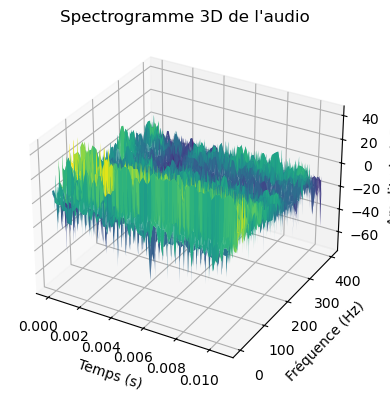

In [135]:
# Visualisation Spectrogramme 3D
fig = plt.figure(figsize=(20, 10))  # Créer une figure de taille 10x10 
ax = fig.add_subplot(222, projection='3d')  # Ajouter un graphique 3D dans la figure
temps = np.arange(fenetre_glissante.shape[1]) / sr  # Calcul des temps pour chaque point du spectrogramme (nombre de colonnes de la fenetre glissante divisé par la fréquence d'échantillonnage)
freqs = np.linspace(0, sr / 20, fenetre_glissante.shape[0])  # Générer une plage de fréquences allant de 0 à sr/2 (maximum théorique)

X, Y = np.meshgrid(temps, freqs)  # Créer un maillage de points avec le temps sur X et les fréquences sur Y
Z = 20 * np.log10(fenetre_glissante)  # Conversion des amplitudes en échelle logarithmique pour représenter les dB (amplitude) sur Z

# Dessiner la surface 3D
ax.plot_surface(X, Y, Z, cmap='viridis')  # Dessiner la surface en 3D avec une carte de couleurs sur graphique 3D
ax.set_xlabel('Temps (s)')  # Étiquette de l'axe X
ax.set_ylabel('Fréquence (Hz)')  # Étiquette de l'axe Y
ax.set_zlabel('Amplitude (dB)')  # Étiquette de l'axe Z
plt.title('Spectrogramme 3D de l\'audio')  # Titre du graphique
plt.show()  # Afficher la figure 3D

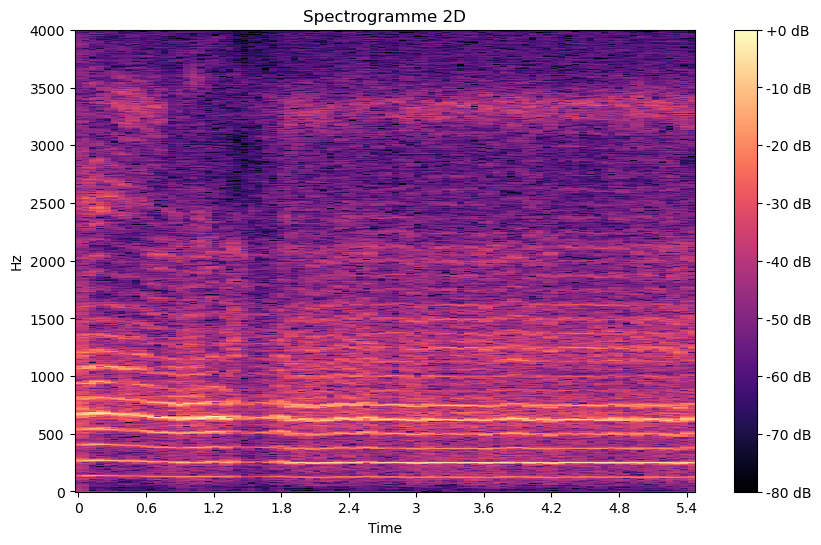

In [136]:
# Affichage du spectrogramme classique 2D
plt.figure(figsize=(10, 6))  # Créer une figure pour le spectrogramme 2D
librosa.display.specshow(librosa.amplitude_to_db(fenetre_glissante, ref=np.max), sr=sr, x_axis='time', y_axis='hz')  
# Affichage du spectrogramme avec la fonction specshow de librosa (échelle en dB, axe X = temps, axe Y = fréquences)

plt.colorbar(format='%+2.0f dB')  # Ajouter une barre colorée indiquant l'amplitude en dB
plt.title('Spectrogramme 2D')  # Titre du spectrogramme 2D
plt.show()  # Afficher le spectrogramme 2D